Creating directed graph for ('FB15k', 'FB15k-237')
Creating directed graph for ('WN18', 'WN18RR')
Creating directed graph for ('FB15k', 'FB15k-237')
Creating directed graph for ('WN18', 'WN18RR')
Creating directed graph for ('FB15k', 'FB15k-237')
Creating directed graph for ('WN18', 'WN18RR')
Creating directed graph for ('FB15k', 'FB15k-237')
Creating directed graph for ('WN18', 'WN18RR')


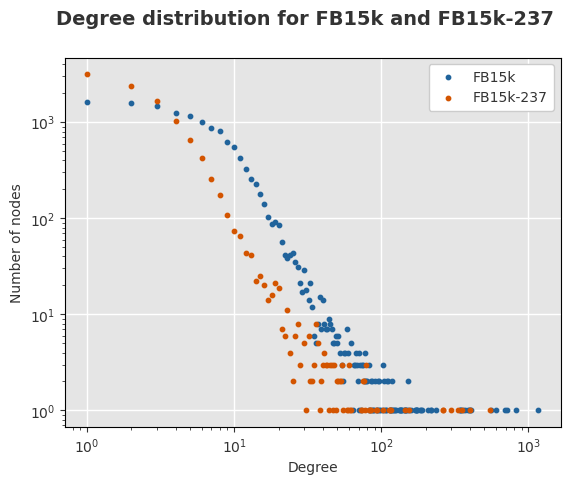

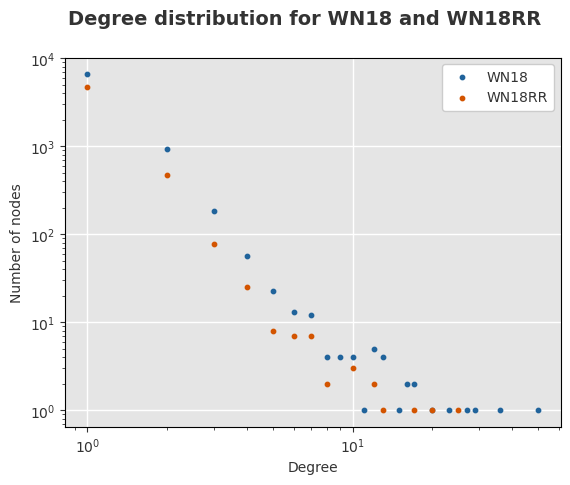

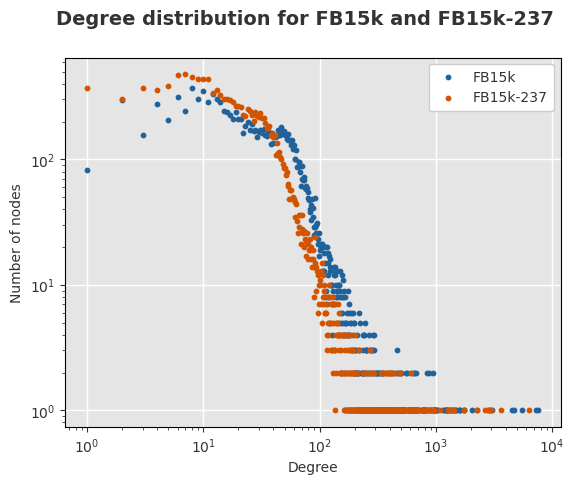

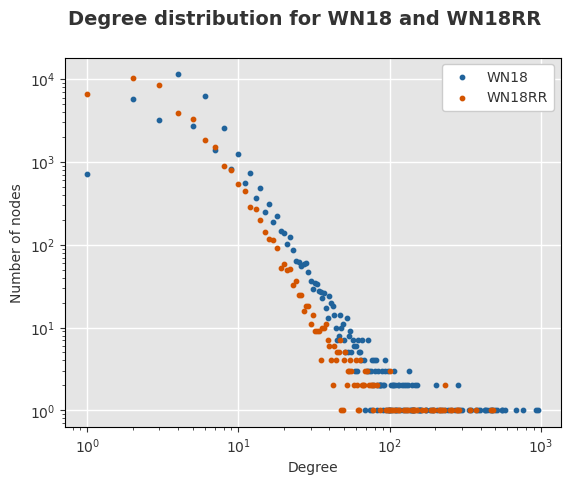

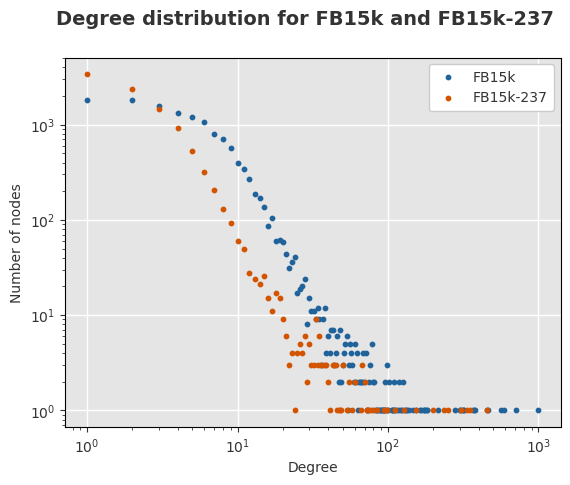

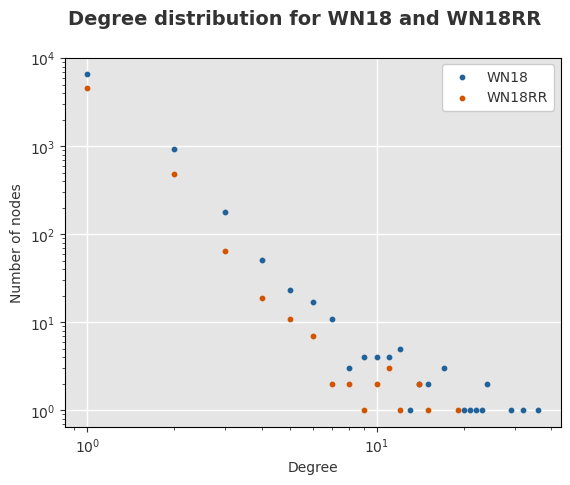

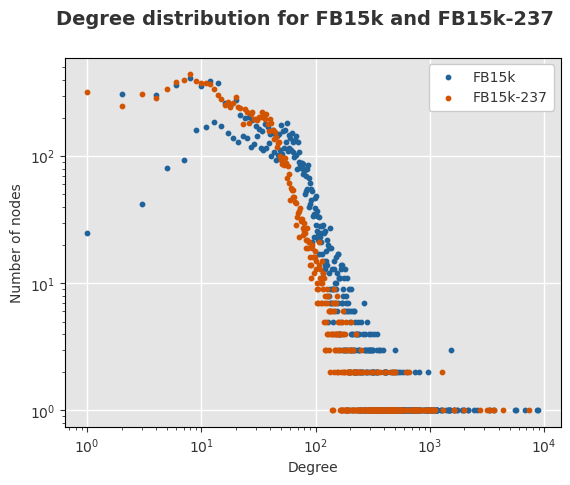

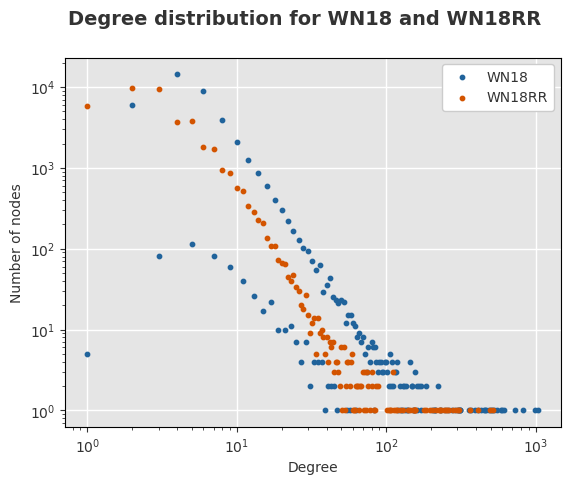

In [9]:
import os
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nx_com
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from collections import Counter
import numpy as np
from statistics import mean
from statistics import median

data_dir = os.getcwd() + "/../data/"


for partition in "test", "train", "valid", "merged":
    graphics_output_dir = os.getcwd() + "/output/network_analysis_custom/{}/".format(partition)
    for dataset in [("FB15k", "FB15k-237"), ("WN18", "WN18RR")]:
        df_normal = pd.read_csv(data_dir + "/{}/CSVFiles/{}.csv".format(dataset[0], partition))
        df_filtered = pd.read_csv(data_dir + "/{}/CSVFiles/{}.csv".format(dataset[1], partition))
        print("Creating directed graph for {}".format(dataset))
        
        directedGraph = nx.from_pandas_edgelist(df_normal, 'head', 'tail', edge_attr="predicate", create_using=nx.DiGraph)
        degrees = [entry[1] for entry in nx.degree(directedGraph)]
        degree_distribution = Counter(degrees)

        directedGraphFiltered = nx.from_pandas_edgelist(df_filtered, 'head', 'tail', edge_attr="predicate", create_using=nx.DiGraph)
        degreesFiltered = [entry[1] for entry in nx.degree(directedGraphFiltered)]
        degree_distributionFiltered = Counter(degreesFiltered)
        
        if not os.path.exists(graphics_output_dir):
            print("creating direc")
            os.makedirs(graphics_output_dir)
        
        for folder in ["degree"]:
            if not os.path.exists(graphics_output_dir + folder):
                os.makedirs(graphics_output_dir + folder)
        
    
        plt.rcParams['axes.facecolor'] = '#e5e5e5'
        plt.rcParams['axes.grid'] = True
        plt.rcParams['grid.alpha'] = 1
        plt.rcParams['grid.linewidth'] = 1
        plt.rcParams['grid.color'] = "#ffffff"
        plt.rcParams['axes.axisbelow'] = True
        label_color = '#333333'
        primaryColor = '#20639b'
        plt.rcParams['text.color'] = label_color
        plt.rcParams['axes.labelcolor'] = label_color
        plt.rcParams['xtick.color'] = label_color
        plt.rcParams['ytick.color'] = label_color


        # Create degree diagram
        degree_x = degree_distribution.keys()
        degree_y = degree_distribution.values()
        degree_x_filtered = degree_distributionFiltered.keys()
        degree_y_filtered = degree_distributionFiltered.values()
        fig, ax = plt.subplots()
        plt.yscale('log')
        plt.xscale('log')
        ax.scatter(degree_x, degree_y, c=primaryColor, s=10, label=dataset[0])
        ax.scatter(degree_x_filtered, degree_y_filtered, c="#D35400", s=10, label=dataset[1])
        fig.suptitle("Degree distribution for {} and {}".format(dataset[0], dataset[1]),fontsize=14, fontweight="bold")
        #ax.set_title("with avg degree {} and median degree {}".format(round(mean(degrees), 2), round(median(degrees), 2)), fontsize=10)
        ax.set_xlabel('Degree', fontsize=10)
        ax.set_ylabel('Number of nodes', fontsize=10)
        ax.legend(facecolor='white', framealpha=1)
        fig.savefig(graphics_output_dir + 'degree/{}.png'.format(dataset[0]), dpi=300)


    
   
   




